In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('dataset - netflix1.csv')

In [23]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [24]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# data cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [26]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [27]:
df.groupby('type').size()

type
Movie      6126
TV Show    2664
dtype: int64

In [28]:
df.isnull().mean()*100

show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [30]:
df['rating']=encoder.fit_transform(df['rating'])

<Axes: >

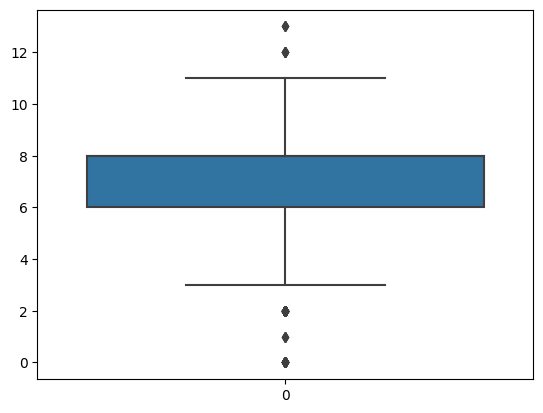

In [31]:
sns.boxplot(df['rating'])

In [32]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,4,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,8,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,8,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,9,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,8,125 min,"Dramas, Independent Movies, International Movies"


In [33]:
percentile25 = df['rating'].quantile(0.25)
percentile75 = df['rating'].quantile(0.75)

In [34]:
percentile75

8.0

In [35]:
iqr = percentile75 - percentile25
iqr

2.0

In [36]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 11.0
Lower limit 3.0


## finding outliers

In [38]:
df[df['rating'] > upper_limit]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
4760,s6582,Movie,Dear Dracula,Chad Van De Keere,United States,2/18/2016,2012,12,43 min,"Children & Family Movies, Comedies"
5134,s7059,Movie,Immoral Tales,Walerian Borowczyk,France,6/6/2019,1974,13,103 min,"Dramas, International Movies, Romantic Movies"
5318,s7293,Movie,Leo the Lion,Mario Cambi,United States,12/20/2015,2013,12,78 min,"Children & Family Movies, Comedies"
5348,s7318,Movie,Little Singham aur Kaal ka Mahajaal,Prakash Satam,Not Given,12/1/2018,2018,12,68 min,"Children & Family Movies, Comedies"
5497,s7514,Movie,Motu Patlu: King of Kings,Suhas Kadav,India,7/6/2017,2016,12,109 min,"Children & Family Movies, Comedies"
5862,s7989,Movie,Sex Doll,Sylvie Verheyde,United Kingdom,7/10/2017,2016,13,103 min,"Dramas, International Movies, Romantic Movies"
6532,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,United States,9/1/2019,2008,13,113 min,"Action & Adventure, Comedies"
8539,s7291,Movie,LEGO Ninjago: Masters of Spinjitzu: Day of the...,Not Given,Denmark,2/1/2019,2016,12,44 min,"Action & Adventure, Children & Family Movies"
8593,s7647,TV Show,Oh No! It's an Alien Invasion,Not Given,Canada,5/31/2015,2014,12,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F..."


In [40]:
df[df['rating'] < lower_limit]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
144,s108,Movie,A Champion Heart,David de Vos,United States,9/4/2021,2018,0,90 min,"Children & Family Movies, Dramas"
970,s934,Movie,Hachi: A Dog's Tale,Lasse Hallström,United Kingdom,5/1/2021,2009,0,93 min,"Children & Family Movies, Dramas"
1106,s1127,Movie,My Fair Lady,George Cukor,United States,4/1/2021,1964,0,173 min,"Classic Movies, Music & Musicals"
1393,s1558,Movie,Canvas,Frank E. Abney III,United States,12/11/2020,2020,0,9 min,"Children & Family Movies, Dramas"
2313,s2912,Movie,A Shaun the Sheep Movie: Farmageddon,"Richard Phelan, Will Becher",United Kingdom,2/14/2020,2019,0,87 min,"Children & Family Movies, Comedies"
...,...,...,...,...,...,...,...,...,...,...
8433,s6672,TV Show,El Barco,Not Given,Spain,7/1/2017,2013,2,3 Seasons,"International TV Shows, Romantic TV Shows, Spa..."
8533,s7264,Movie,Lady-Like,Not Given,United States,1/18/2019,2018,1,83 min,"Comedies, Independent Movies"
8584,s7598,TV Show,North & South,Not Given,United Kingdom,3/31/2017,2004,2,1 Season,"British TV Shows, Romantic TV Shows, TV Dramas"
8653,s7909,TV Show,Russell Peters vs. the World,Not Given,United States,10/14/2013,2013,2,1 Season,"Docuseries, Stand-Up Comedy & Talk Shows"


## trimming

In [58]:
new_df = df[df['rating'] < upper_limit]
new_df.shape

(8448, 10)

In [59]:
new_df = new_df[new_df['rating'] > lower_limit]
new_df.shape

(8038, 10)

In [66]:
import seaborn as sns
import numpy as np

C:\Users\gopal\AppData\Local\Temp\ipykernel_13052\3435107626.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])
C:\Users\gopal\AppData\Local\Temp\ipykernel_13052\3435107626.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['rating'])


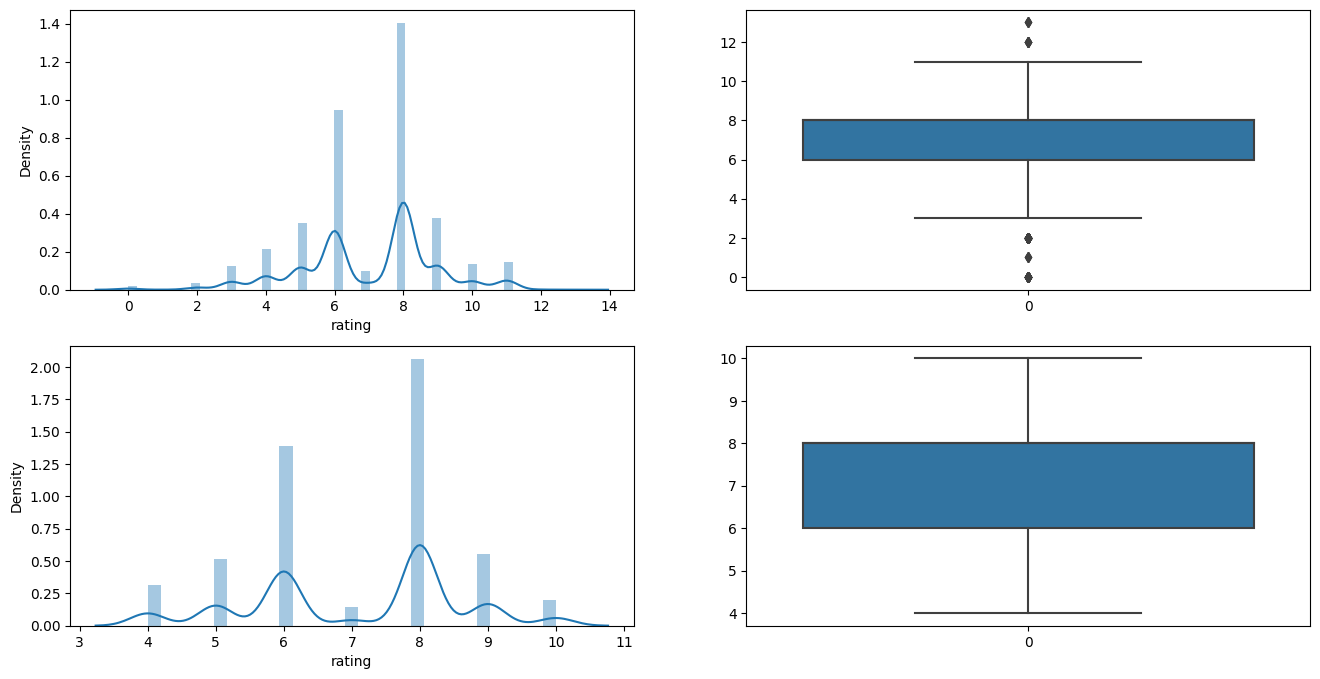

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['rating'])

plt.subplot(2,2,2)
sns.boxplot(df['rating'])

plt.subplot(2,2,3)
sns.distplot(new_df['rating'])

plt.subplot(2,2,4)
sns.boxplot(new_df['rating'])

plt.show()

C:\Users\gopal\AppData\Local\Temp\ipykernel_13052\2170132713.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])
C:\Users\gopal\AppData\Local\Temp\ipykernel_13052\2170132713.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['rating'])


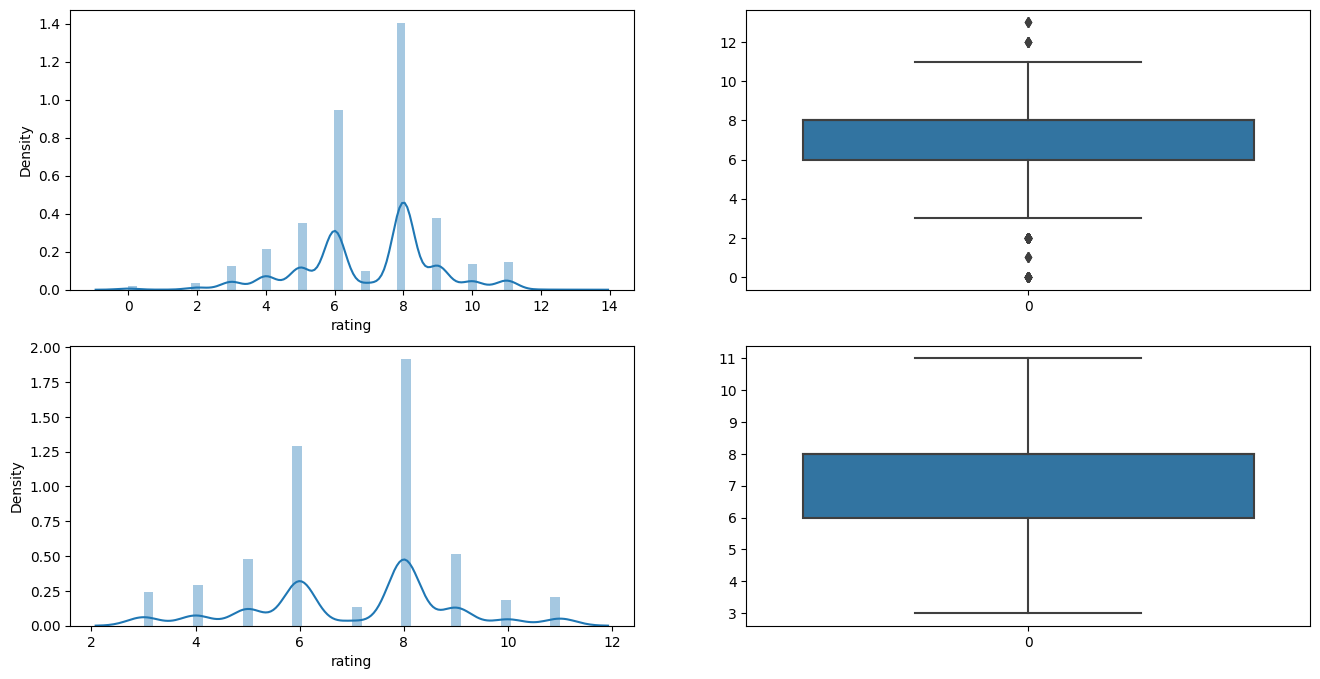

In [69]:
new_df_cap = df.copy()

new_df_cap['rating'] = np.where(
    new_df_cap['rating'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['rating'] < lower_limit,
        lower_limit,
        new_df_cap['rating']
    )
)
new_df_cap.shape
(1000, 3)
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['rating'])

plt.subplot(2,2,2)
sns.boxplot(df['rating'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['rating'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['rating'])

plt.show()